In [ ]:
import pathlib
import numpy as np
import os


In [17]:
base_dataset_path = r'H:\dev\mit\UNCWave\datasetfiles\FlatVel_A'
folders_to_process = ['model', 'data'] # List the specific folders you want to process
sub_folders_to_process = ['model', 'data']
data ={}

# --- Iteration Logic ---
for folder_name in folders_to_process:
    folder_path = pathlib.Path(base_dataset_path) / folder_name

    # Check if the folder actually exists
    if not folder_path.is_dir():
        print(f"Warning: Folder not found: {folder_path}")
        continue # Skip to the next folder if it doesn't exist

    print(f"\n--- Processing files in: {folder_path} ---")

    # Iterate through all items (files and directories) in the folder
    for item in folder_path.iterdir():
        # Check if the item is a file
        if item.is_file():
            print(f"Found file: {item.name}") # item.name is just the file name
            print(f"Full path: {item}") # item is the full Path object

            # --- Example: Load .npy files ---
            if item.suffix == '.npy': # Check file extension
                try:
                    print(f"Attempting to load .npy file: {item.name}")
                    data[folder_name] = np.load(item)
                    print(f"Successfully loaded {item.name}. Shape: {data.shape}")
                    # You can now work with the 'data' variable
                    # e.g., store it in a dictionary: all_data[item.name] = data
                    # Note: 'data' is overwritten in each iteration
                except Exception as e:
                    print(f"Error loading {item.name}: {e}")

            # --- Add other file type handling here ---
            # elif item.suffix == '.txt':
            #     print(f"Found text file: {item.name}")
            #     with open(item, 'r') as f:
            #         content = f.read()
            #         # Process content
            #         # print(content[:100]) # Print first 100 chars

# If you want to iterate through ALL subdirectories recursively:
# print("\n--- Recursively processing ALL files in all subfolders ---")
# base_path_obj = pathlib.Path(base_dataset_path)
# for item in base_path_obj.rglob('*'): # rglob('*') matches all files and directories recursively
#      if item.is_file():
#          print(f"Found recursive file: {item}")
#          # Add processing logic here, like loading .npy files as shown above
velocity = data['model']
data = data['data']


--- Processing files in: H:\dev\mit\UNCWave\datasetfiles\FlatVel_A\model ---
Found file: model2.npy
Full path: H:\dev\mit\UNCWave\datasetfiles\FlatVel_A\model\model2.npy
Attempting to load .npy file: model2.npy
Error loading model2.npy: 'dict' object has no attribute 'shape'
Found file: model1.npy
Full path: H:\dev\mit\UNCWave\datasetfiles\FlatVel_A\model\model1.npy
Attempting to load .npy file: model1.npy
Error loading model1.npy: 'dict' object has no attribute 'shape'

--- Processing files in: H:\dev\mit\UNCWave\datasetfiles\FlatVel_A\data ---
Found file: data2.npy
Full path: H:\dev\mit\UNCWave\datasetfiles\FlatVel_A\data\data2.npy
Attempting to load .npy file: data2.npy
Error loading data2.npy: 'dict' object has no attribute 'shape'
Found file: data1.npy
Full path: H:\dev\mit\UNCWave\datasetfiles\FlatVel_A\data\data1.npy
Attempting to load .npy file: data1.npy
Error loading data1.npy: 'dict' object has no attribute 'shape'


In [18]:
print('Velocity map size:', velocity.shape)
print('Seismic data size:', data.shape)

Velocity map size: (500, 1, 70, 70)
Seismic data size: (500, 5, 1000, 70)


In [19]:
import matplotlib.pyplot as plt
## Select a sample in the data
sample=14

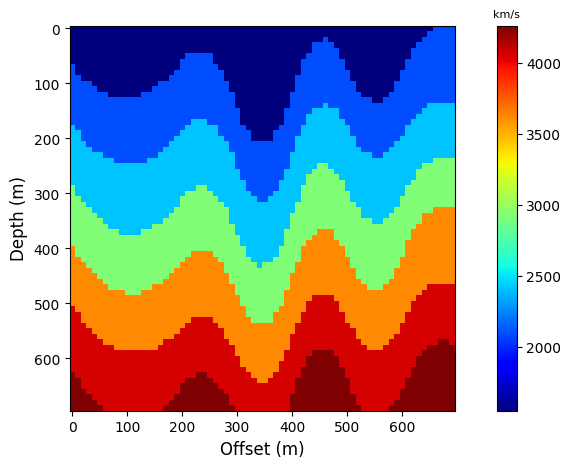

In [20]:
from matplotlib.colors import ListedColormap
fig, ax = plt.subplots(1, 1, figsize=(11, 5))
img=ax.imshow(velocity[sample,0,:,:],cmap='jet')
ax.set_xticks(range(0, 70, 10))
ax.set_xticklabels(range(0, 700, 100))
ax.set_yticks(range(0, 70, 10))
ax.set_yticklabels(range(0, 700, 100))
ax.set_ylabel('Depth (m)', fontsize=12)
ax.set_xlabel('Offset (m)', fontsize=12)
clb=plt.colorbar(img, ax=ax)
clb.ax.set_title('km/s',fontsize=8)
plt.show()

Seismic data size: (500, 5, 1000, 70)


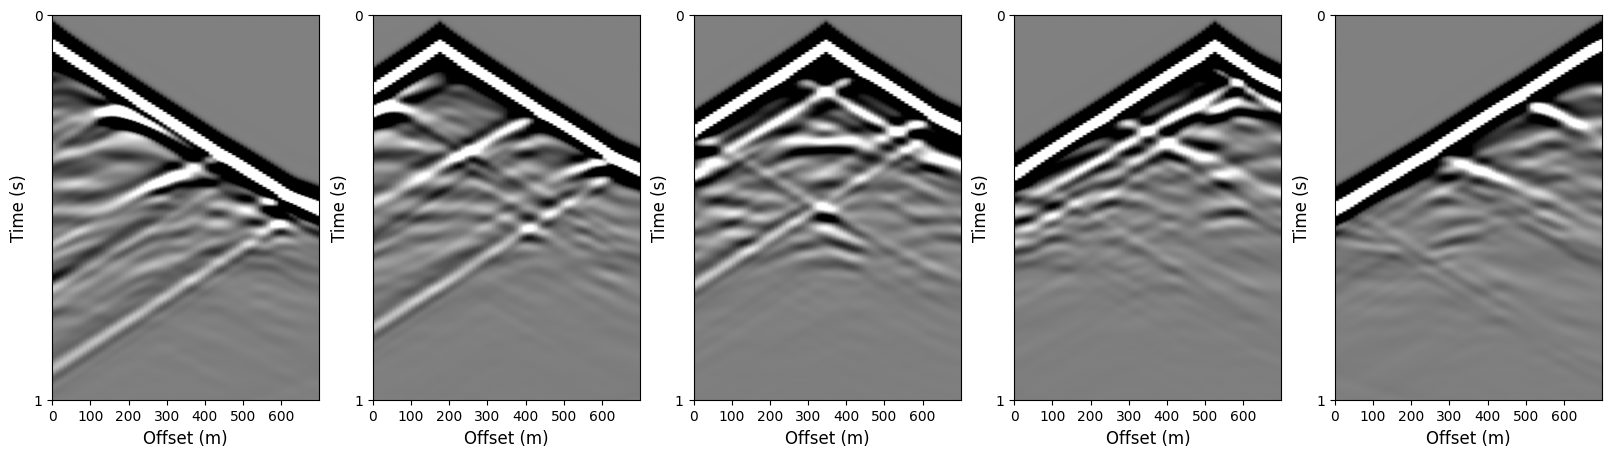

In [22]:
print('Seismic data size:', data.shape)

fig,ax=plt.subplots(1,5,figsize=(20,5))
ax[0].imshow(data[sample,0,:,:],extent=[0,70,1000,0],aspect='auto',cmap='gray',vmin=-0.5,vmax=0.5)
ax[1].imshow(data[sample,1,:,:],extent=[0,70,1000,0],aspect='auto',cmap='gray',vmin=-0.5,vmax=0.5)
ax[2].imshow(data[sample,2,:,:],extent=[0,70,1000,0],aspect='auto',cmap='gray',vmin=-0.5,vmax=0.5)
ax[3].imshow(data[sample,3,:,:],extent=[0,70,1000,0],aspect='auto',cmap='gray',vmin=-0.5,vmax=0.5)
ax[4].imshow(data[sample,4,:,:],extent=[0,70,1000,0],aspect='auto',cmap='gray',vmin=-0.5,vmax=0.5)
for axis in ax:
   axis.set_xticks(range(0, 70, 10))
   axis.set_xticklabels(range(0, 700, 100))
   axis.set_yticks(range(0, 2000, 1000))
   axis.set_yticklabels(range(0, 2,1))
   axis.set_ylabel('Time (s)', fontsize=12)
   axis.set_xlabel('Offset (m)', fontsize=12)
plt.show()

In [23]:
!python train.py -ds flatvel-tutorial -n tutorial -m InversionNet -g1v 1 -g2v 0  --tensorboard -t kaggle_tutorial_train.txt -v kaggle_tutorial_val.txt  --lr 0.0001 -b 120 -eb 10 -nb 5

C:\Users\konno\AppData\Local\Programs\Python\Python312\python.exe: can't open file 'h:\\dev\\mit\\UNCWave\\train.py': [Errno 2] No such file or directory
